In [1]:
# %% [markdown]
# # 02 - 音符分析
# 深入探索MIDI文件中的音符级数据

# %%
import pretty_midi
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import os
import warnings

# 过滤pretty_midi的格式警告
warnings.filterwarnings("ignore", category=RuntimeWarning, 
                        module="pretty_midi", 
                        message="Tempo, Key or Time signature change events found on non-zero tracks")

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

print("环境准备完成！")

环境准备完成！


In [2]:
# %% [markdown]
# ## 1. 加载多首曲子进行对比分析

# %%
def load_midi_files(directory):
    """加载目录中的所有MIDI文件"""
    midi_files = {}
    for file in os.listdir(directory):
        if file.endswith('.mid'):
            try:
                midi_path = os.path.join(directory, file)
                midi_files[file] = pretty_midi.PrettyMIDI(midi_path)
                print(f"成功加载: {file}")
            except Exception as e:
                print(f"加载失败 {file}: {e}")
    return midi_files

# 加载数据
data_dir = "data/sakamoto_samples"
midi_dict = load_midi_files(data_dir)

print(f"\n总共加载了 {len(midi_dict)} 首曲子")
#midi_files 是字典  {string曲名:一个PrettyMIDI对象}
#midi_files = midi_dict 是后面部分的重要数据结构

成功加载: Always_with_you_Hisaishi.mid
成功加载: Amore_Ryuichi.mid
成功加载: Andata_Ryuichi.mid
成功加载: Aqua_Ryuichi.mid
成功加载: A_Summers_Day_Hisaishi.mid
成功加载: Castle_in_the_Sky_Hisaishi.mid
成功加载: Dancing_in_the_sky_Ryuichi.mid
成功加载: Energy_Flow_Ryuichi.mid
成功加载: Koko_Ryuichi.mid
成功加载: MCMrL_Ryuichi.mid
成功加载: My_Neighbor_Hisaishi.mid
成功加载: Opus_Ryuichi.mid
成功加载: Rain_Ryuichi.mid
成功加载: roger_patanao_blue_things.mid
成功加载: Summer_Hisaishi.mid
成功加载: Thousand_Knives_Ryuichi.mid

总共加载了 16 首曲子


In [3]:
# %% [markdown]
# ## 多轨道合并分析函数定义 / 该方法仅用来分析一首曲子的 音符列表

# %%
def calculate_note_stats(notes, song_name):
    """计算音符统计特征/参数notes是某一首曲子的音符列表"""
    if not notes:
        return None
    
    pitches = [note.pitch for note in notes]
    durations = [note.end - note.start for note in notes]
    velocities = [note.velocity for note in notes]
    
    stats = {
        'song_name': song_name,
        'total_notes': len(notes),
        'pitch_mean': np.mean(pitches),
        'pitch_std': np.std(pitches),
        'pitch_range': (min(pitches), max(pitches)),
        'duration_mean': np.mean(durations),
        'duration_std': np.std(durations),
        'velocity_mean': np.mean(velocities),
        'velocity_std': np.std(velocities)
    }
    
    return stats
#stats是字典  9个关键字--音符特征：音符数，音高/时长/力度平均值/标准差/音高范围等 
#方法内部三个变量仅仅就是列表
#pitches：List[int] (0-127)  提取该曲目所有音高值
#durations：List[float] (秒)  提取该曲所有音符的持续时间
#velocities：List[int] (0-127) 提取该曲目所有音符的力度值

In [4]:
# %% [markdown]
# ## 2. 音符基础统计分析/参数 midi_data是一首曲子
def analyze_all_tracks(midi_data, song_name):
    """合并分析所有轨道的音符/参数midi_data是一个PrettyMIDI对象"""
    all_notes = []
    #all_notes是列表，由一首曲子构成的音符列表
    for instrument in midi_data.instruments:
        all_notes.extend(instrument.notes)
    
    # 基于合并音符计算特征
    merged_stats = calculate_note_stats(all_notes, song_name)
    #merged_stats是字典
    if merged_stats:
        merged_stats['num_tracks'] = len(midi_data.instruments)  # 轨道数量作为特征
        merged_stats['tempo'] = midi_data.estimate_tempo()
        merged_stats['duration_sec'] = midi_data.get_end_time()
    
    return merged_stats, all_notes
# 该方法的返回值是一个元组  一个字典(统计特征)  / 一个列表 
# merged_stats = calculate_note_stats() 是字典类型
#相当于是通过calculate_note_stats()方法拿到了9个关键字构成的字典信息。
#后面if一段等于是又追加3个关键字构成的信息，这样最终merged_stats就有了12个关键字构成的信息
#这是一首曲子统计的最基本特征   字典9个关键字  +  一个音符表


=== Always_with_you_Hisaishi.mid ===
轨道数量: 8
总音符数: 2590
平均音高: 65.2
音高范围: 48 - 81
平均时长: 0.37秒
平均力度: 100.0
估计速度: 242.9 BPM
曲子时长: 216.2秒

=== Amore_Ryuichi.mid ===
轨道数量: 1
总音符数: 2072
平均音高: 65.6
音高范围: 28 - 103
平均时长: 1.22秒
平均力度: 52.3
估计速度: 73.8 BPM
曲子时长: 336.5秒

=== Andata_Ryuichi.mid ===
轨道数量: 1
总音符数: 579
平均音高: 57.8
音高范围: 32 - 78
平均时长: 2.88秒
平均力度: 49.7
估计速度: 82.7 BPM
曲子时长: 277.9秒

=== Aqua_Ryuichi.mid ===
轨道数量: 1
总音符数: 901
平均音高: 61.7
音高范围: 24 - 91
平均时长: 1.54秒
平均力度: 56.3
估计速度: 149.8 BPM
曲子时长: 259.2秒

=== A_Summers_Day_Hisaishi.mid ===
轨道数量: 1
总音符数: 828
平均音高: 60.8
音高范围: 52 - 83
平均时长: 0.18秒
平均力度: 49.7
估计速度: 110.0 BPM
曲子时长: 149.8秒

=== Castle_in_the_Sky_Hisaishi.mid ===
轨道数量: 1
总音符数: 1105
平均音高: 65.2
音高范围: 31 - 103
平均时长: 0.46秒
平均力度: 80.5
估计速度: 219.7 BPM
曲子时长: 136.8秒

=== Dancing_in_the_sky_Ryuichi.mid ===
轨道数量: 1
总音符数: 517
平均音高: 70.5
音高范围: 44 - 96
平均时长: 0.26秒
平均力度: 55.9
估计速度: 159.8 BPM
曲子时长: 68.7秒

=== Energy_Flow_Ryuichi.mid ===
轨道数量: 1
总音符数: 1121
平均音高: 63.2
音高范围: 36 - 98
平均时长: 1.04秒
平均力度: 58

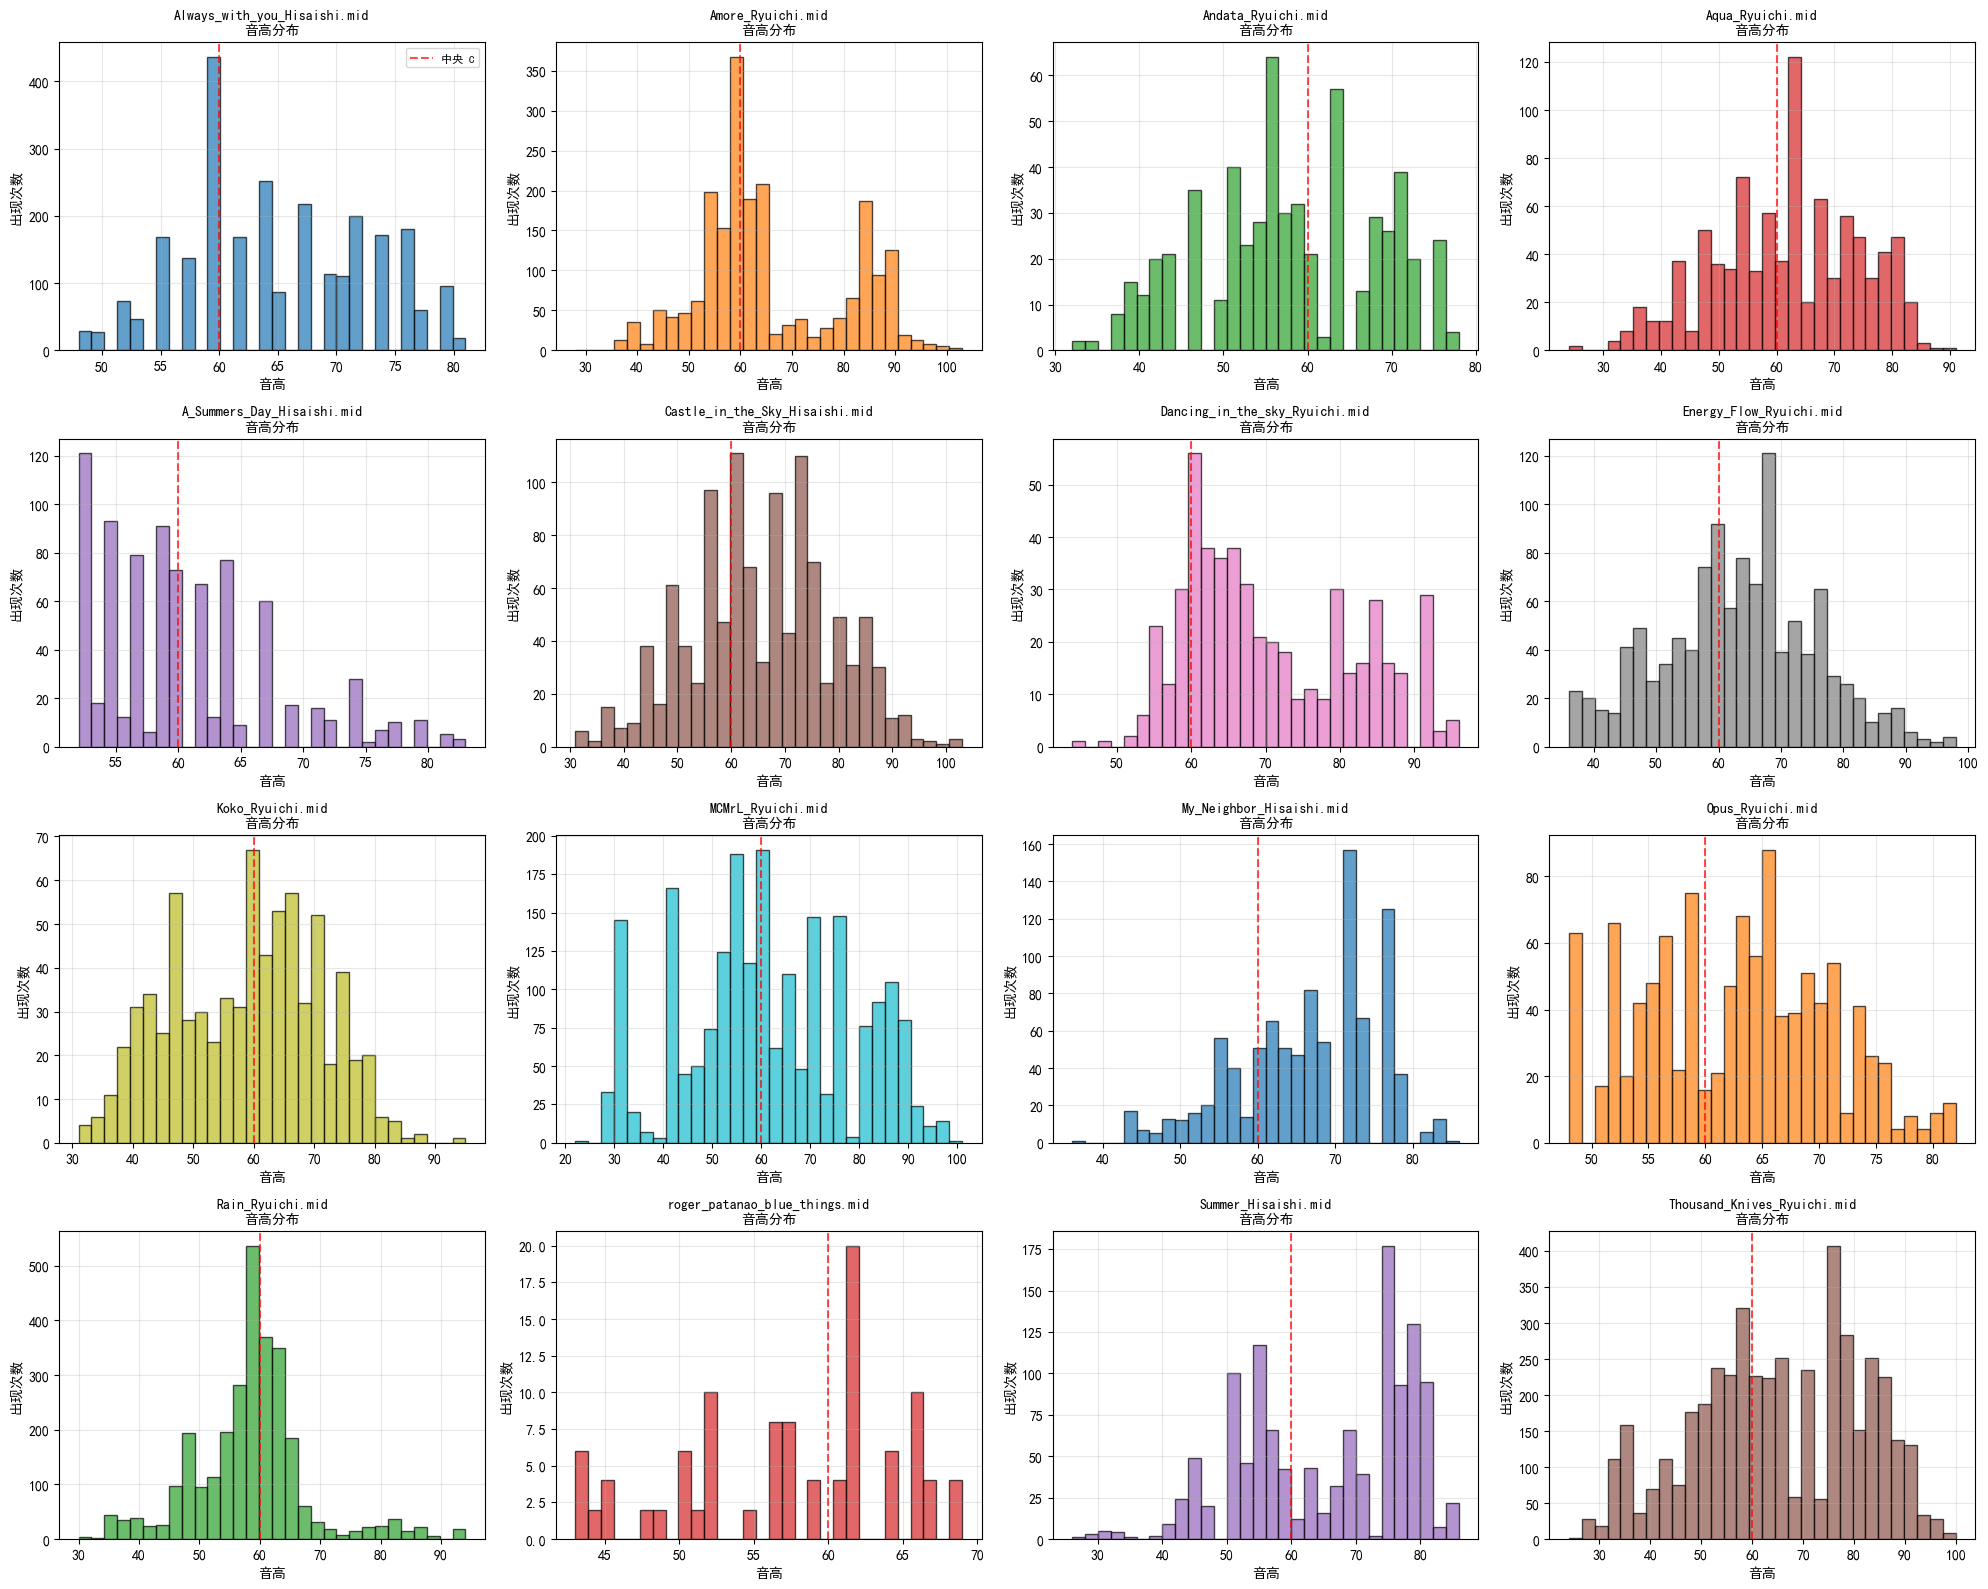

In [5]:
# %% [markdown]
# ## 3. 多曲子对比分析

# %%
# 分析所有曲子的音符特征（使用多轨道合并分析）
all_stats = []
all_notes_data = {}

for song_name, midi_data in midi_dict.items():
    result = analyze_all_tracks(midi_data, song_name)  # 使用新的多轨道分析函数
    if result:
        stats, notes = result
        all_stats.append(stats)
        all_notes_data[song_name] = notes
        print(f"\n=== {song_name} ===")
        print(f"轨道数量: {stats['num_tracks']}")
        print(f"总音符数: {stats['total_notes']}")
        print(f"平均音高: {stats['pitch_mean']:.1f}")
        print(f"音高范围: {stats['pitch_range'][0]} - {stats['pitch_range'][1]}")
        print(f"平均时长: {stats['duration_mean']:.2f}秒")
        print(f"平均力度: {stats['velocity_mean']:.1f}")
        print(f"估计速度: {stats['tempo']:.1f} BPM")
        print(f"曲子时长: {stats['duration_sec']:.1f}秒")

#根据上面analyze_all_tracks() 方法逐一分析每首曲子，输出一个最基本特征，由9个关键字构成

#下面两个变量为后序分析提供了信息源
#all_notes_data 是是字典{"曲名":音符信息列表}，包含所有曲子(主要是音符信息)
#all_stats      是列表，其元素类型是字典，由一个曲子的9个特征构成

# %% [markdown]
# ## 4. 音高分布分析（修复版 - 支持多曲子）

# %%
# 绘制音高分布对比图 - 动态调整子图布局
n_songs = len(all_notes_data)
n_cols = 4  # 每行显示4首曲子
n_rows = (n_songs + n_cols - 1) // n_cols  # 计算需要的行数

plt.figure(figsize=(5*n_cols, 4*n_rows))

for i, (song_name, notes) in enumerate(all_notes_data.items()):
    pitches = [note.pitch for note in notes]
    
    plt.subplot(n_rows, n_cols, i+1)
    plt.hist(pitches, bins=30, alpha=0.7, color=f'C{i}', edgecolor='black')
    plt.xlabel('音高')
    plt.ylabel('出现次数')
    plt.title(f'{song_name}\n音高分布', fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # 标记中央C (60)
    plt.axvline(x=60, color='red', linestyle='--', alpha=0.7, label='中央 C')
    if i == 0:  # 只在第一个图上显示图例
        plt.legend(fontsize=8)

plt.tight_layout()
plt.show()


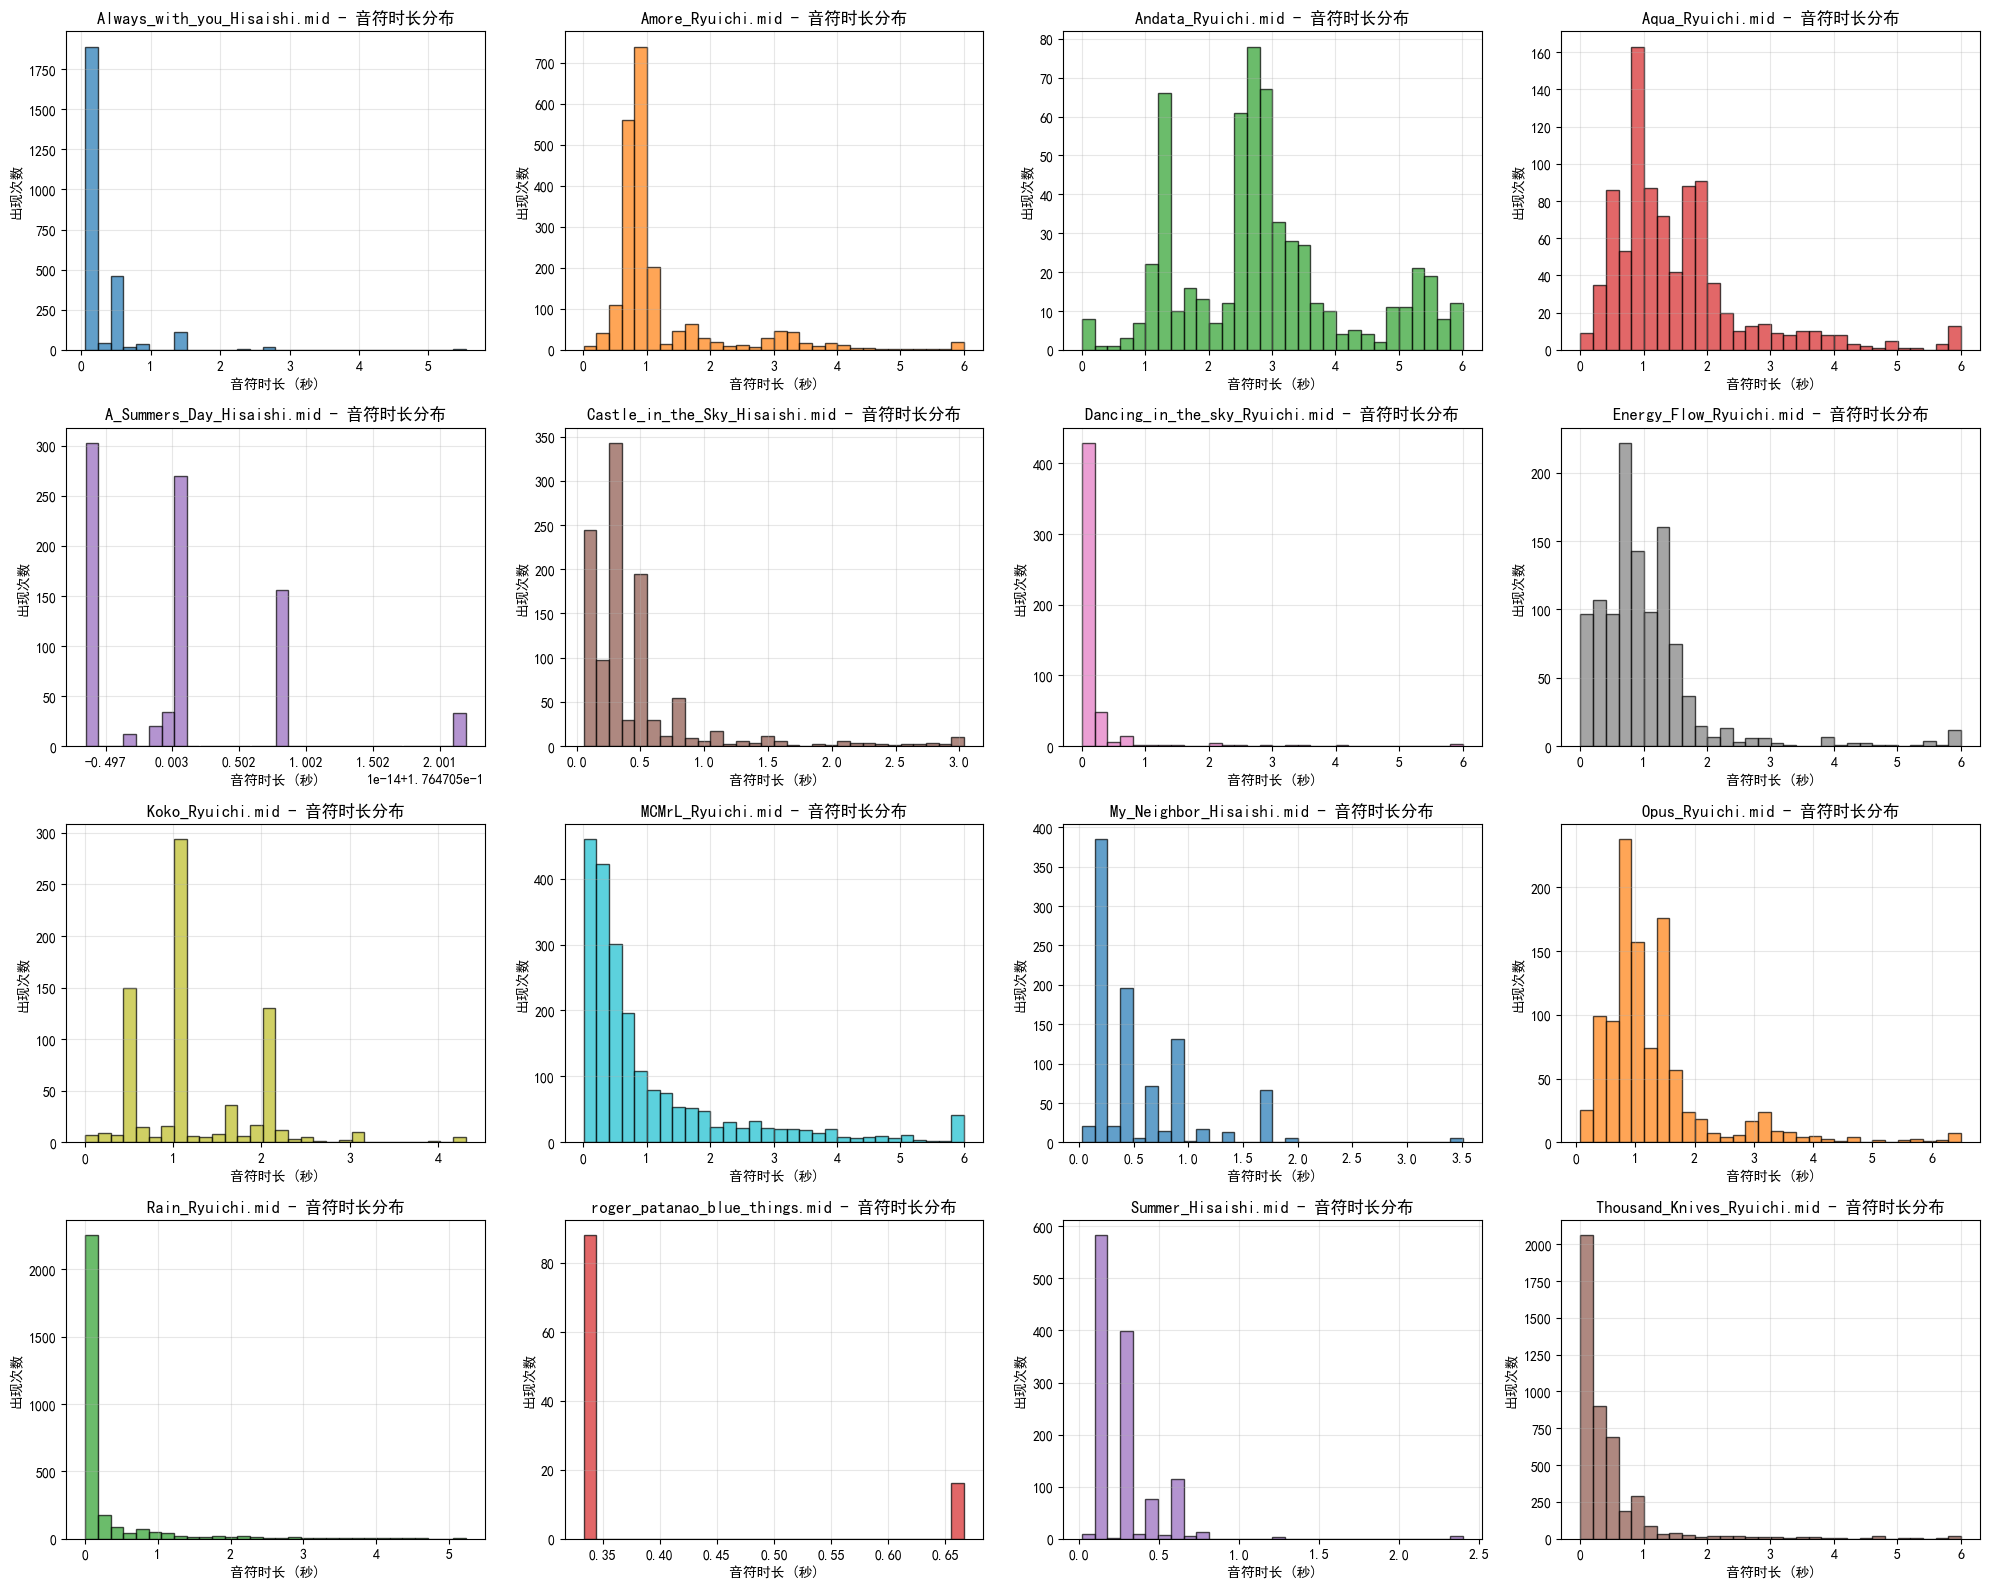

In [6]:
# %% [markdown]
# ## 5. 音符时长分析

# %%
# 音符时长分析
#n_songs = len(all_notes_data)
#n_cols = 4  # 每行显示4首曲子
#n_rows = (n_songs + n_cols - 1) // n_cols  # 计算需要的行数
plt.figure(figsize=(5*n_cols, 4*n_rows))

for i, (song_name, notes) in enumerate(all_notes_data.items()):
    durations = [note.end - note.start for note in notes]
    
    plt.subplot(n_rows, n_cols, i+1)
    # 过滤掉异常长的音符（可能是休止符或错误数据）
    reasonable_durations = [d for d in durations if d < 10]
    plt.hist(reasonable_durations, bins=30, alpha=0.7, color=f'C{i}', edgecolor='black')
    plt.xlabel('音符时长 (秒)')
    plt.ylabel('出现次数')
    plt.title(f'{song_name} - 音符时长分布')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

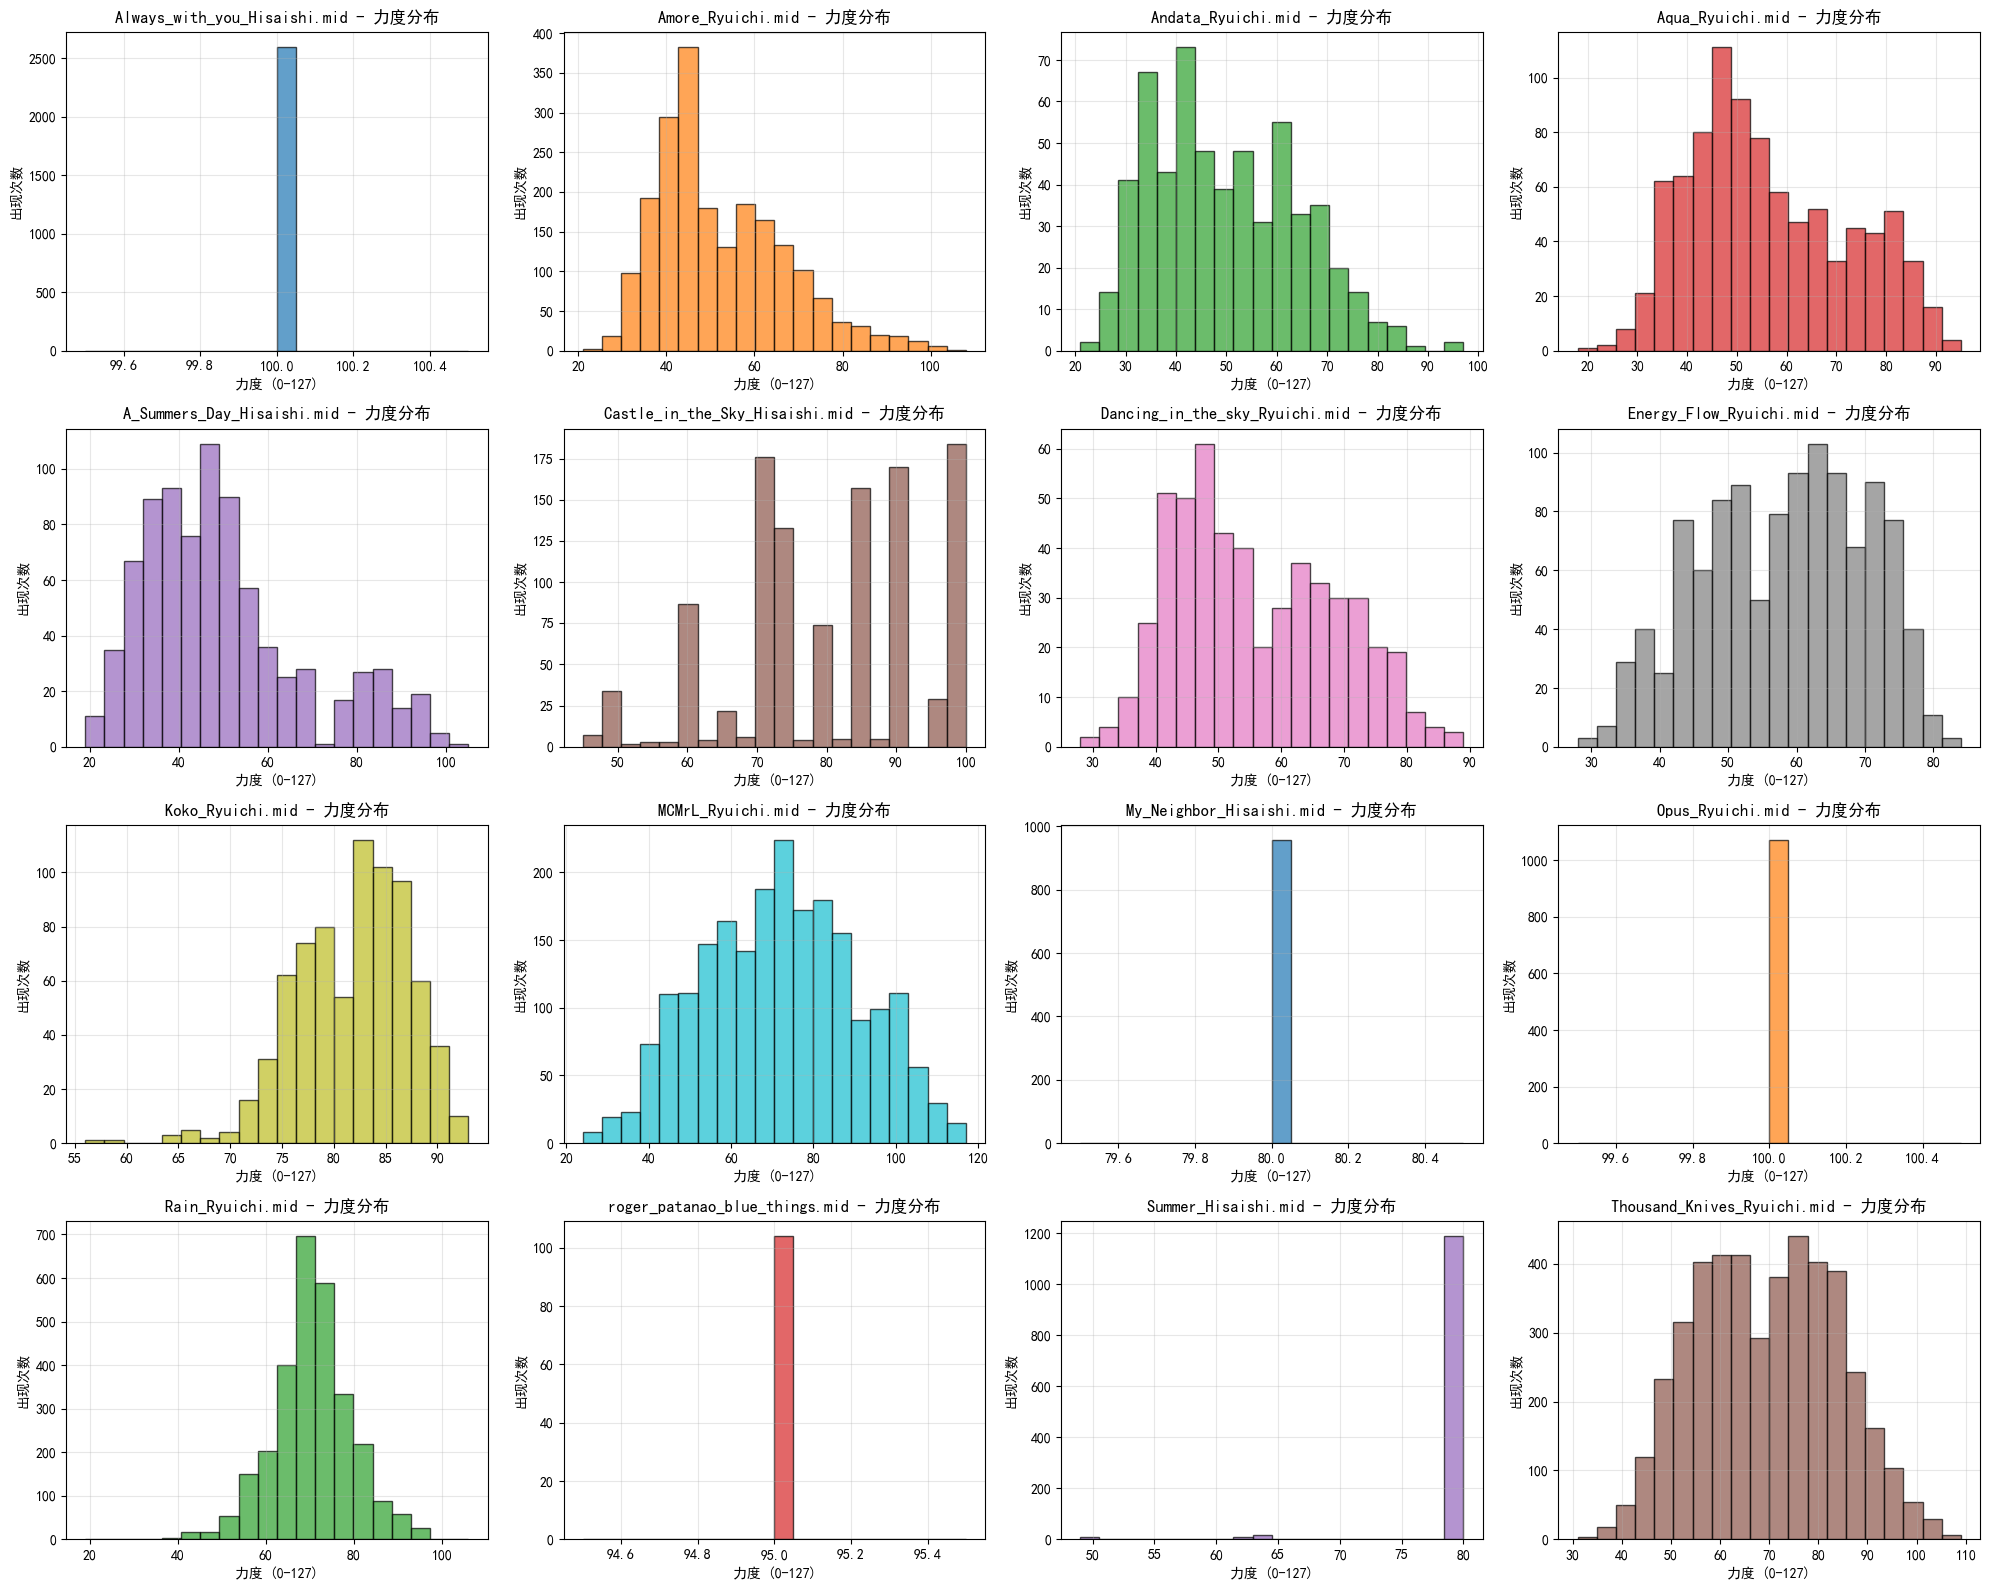

In [7]:
# %% [markdown]
# ## 6. 力度分析

# %%
# 力度分析（按键强度）
plt.figure(figsize=(5*n_cols, 4*n_rows))

for i, (song_name, notes) in enumerate(all_notes_data.items()):
    velocities = [note.velocity for note in notes]
    
    plt.subplot(n_rows, n_cols, i+1)
    plt.hist(velocities, bins=20, alpha=0.7, color=f'C{i}', edgecolor='black')
    plt.xlabel('力度 (0-127)')
    plt.ylabel('出现次数')
    plt.title(f'{song_name} - 力度分布')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

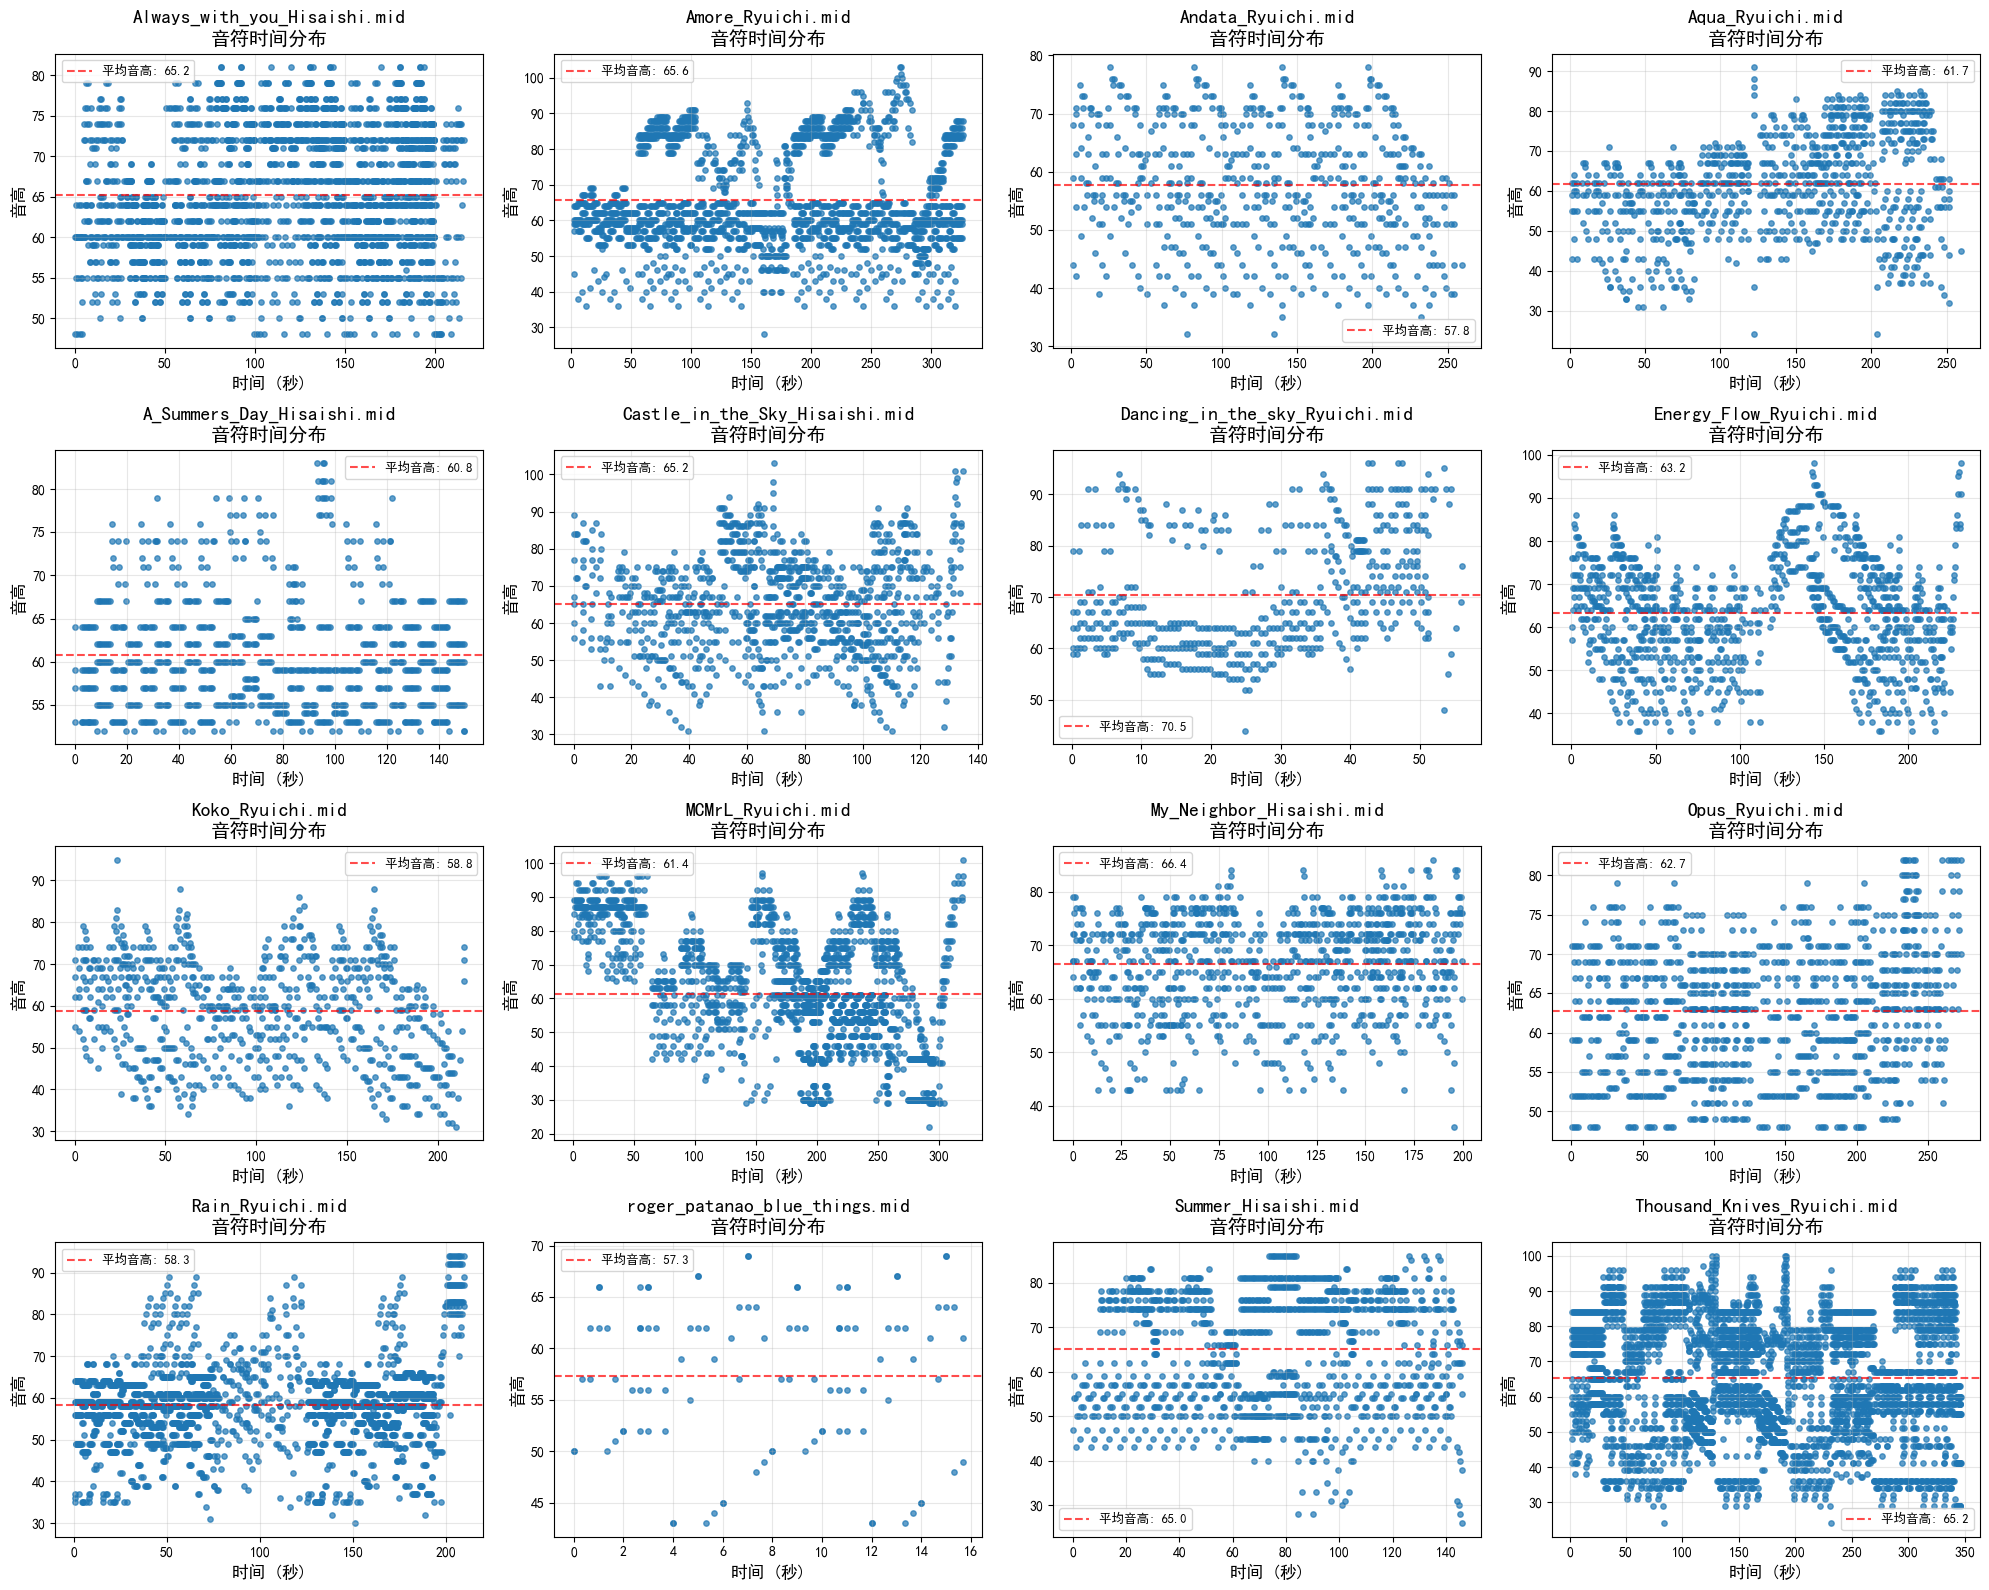

In [8]:
# %% [markdown]
# ## 7. 时间序列分析

# %%
# 音符出现的时间模式分析
plt.figure(figsize=(20,16))  # 增加单个图表尺寸  (10*n_cols, 6*n_rows)

for i, (song_name, notes) in enumerate(all_notes_data.items()):
    start_times = [note.start for note in notes]
    pitches = [note.pitch for note in notes]
    
    plt.subplot(n_rows, n_cols, i+1)   #目前是4*4 个，还可以(8,2,i+1)
    plt.scatter(start_times, pitches, alpha=0.7, s=15)  # 增加点的大小和透明度
    plt.xlabel('时间 (秒)', fontsize=12)
    plt.ylabel('音高', fontsize=12)
    plt.title(f'{song_name}\n音符时间分布', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    
    # 添加一些统计信息到图表
    avg_pitch = np.mean(pitches)
    plt.axhline(y=avg_pitch, color='red', linestyle='--', alpha=0.7, 
                label=f'平均音高: {avg_pitch:.1f}')
    
    # 如果曲子很长，可以设置x轴范围显示前60秒
    #if max(start_times) > 60:
    #    plt.xlim(0, 60)
    #    plt.text(0.98, 0.02, '显示前60秒', transform=plt.gca().transAxes, 
    #            ha='right', va='bottom', fontsize=10, 
    #            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.legend(fontsize=9)

plt.tight_layout()
plt.show()

In [9]:
# %% [markdown]
# ## 8. 高级特征提取

# %%
def extract_advanced_features(notes):
    """提取高级音乐特征"""
    if not notes:
        return {}
    
    pitches = [note.pitch for note in notes]
    durations = [note.end - note.start for note in notes]
    velocities = [note.velocity for note in notes]
    
    # 音高变化特征
    pitch_changes = [abs(pitches[i] - pitches[i-1]) for i in range(1, len(pitches))]
    
    # 节奏变化特征
    start_times = [note.start for note in notes]
    time_intervals = [start_times[i] - start_times[i-1] for i in range(1, len(start_times))]
    
    features = {
        'pitch_variety': len(set(pitches)),  # 使用的不同音高数量
        'avg_pitch_change': np.mean(pitch_changes) if pitch_changes else 0,
        'rhythm_consistency': np.std(time_intervals) if time_intervals else 0,
        'dynamic_range': max(velocities) - min(velocities),
        'note_density': len(notes) / (max(start_times) if start_times else 1)
    }
#本方法分析的是一首曲子的特征，过程的结果在变量features字典上，由5个关键字构成
#这变量也是返回值    
    return features

#下面2个变量是 上面第3步处理出来的信息
#all_notes_data 是是字典{"曲名":音符信息列表}，包含所有曲子(主要是音符信息)
#all_stats      是列表，其元素类型是字典，由一个曲子的9个特征构成

# 提取所有曲子的高级特征
print("=== 高级特征分析 ===")
for song_name, notes in all_notes_data.items():
    features = extract_advanced_features(notes)
    print(f"\n{song_name}:")
    print(f"  使用音高种类: {features['pitch_variety']}")
    print(f"  平均音高变化: {features['avg_pitch_change']:.1f}")
    print(f"  节奏一致性: {features['rhythm_consistency']:.3f}")
    print(f"  力度动态范围: {features['dynamic_range']}")
    print(f"  音符密度: {features['note_density']:.1f} 音符/秒")

#音高种类：曲子中使用了多少个不同的音符（如C、D、E等）
#平均音高变化：相邻音符间音高跳跃的平均幅度
#节奏一致性：音符时间间隔的稳定程度（值越小节奏越规整）
#力度动态范围：最弱音与最强音的力度差异范围
#音符密度：每秒的音符数量，反映曲子紧凑程度

#具体稍复杂的信息:
#节奏一致性：相邻音符开始时间间隔的标准差
#值越小 = 节奏越规整（像节拍器） 值越大 = 节奏越自由（像rubato）
#假设4个音符的开始时间：[0.0, 1.0, 2.0, 3.0]
#时间间隔：              [1.0, 1.0, 1.0]
#标准差 = 0（完美规整）
#假设开始时间：[0.0, 0.9, 2.1, 3.2]
#时间间隔：       [0.9, 1.2, 1.1]
#标准差 = 0.12（稍有变化）
#标准差越小 → 节奏越像机器一样精准   标准差越大 → 节奏越自由随性

#音符密度：总音符数 ÷ 曲子总时长（秒）
#值越大 = 音符越密集紧凑 值越小 = 音符越稀疏舒缓

=== 高级特征分析 ===

Always_with_you_Hisaishi.mid:
  使用音高种类: 21
  平均音高变化: 4.0
  节奏一致性: 9.050
  力度动态范围: 0
  音符密度: 12.0 音符/秒

Amore_Ryuichi.mid:
  使用音高种类: 52
  平均音高变化: 11.8
  节奏一致性: 1.166
  力度动态范围: 87
  音符密度: 6.4 音符/秒

Andata_Ryuichi.mid:
  使用音高种类: 31
  平均音高变化: 11.1
  节奏一致性: 1.858
  力度动态范围: 76
  音符密度: 2.2 音符/秒

Aqua_Ryuichi.mid:
  使用音高种类: 57
  平均音高变化: 12.9
  节奏一致性: 1.079
  力度动态范围: 77
  音符密度: 3.5 音符/秒

A_Summers_Day_Hisaishi.mid:
  使用音高种类: 24
  平均音高变化: 6.7
  节奏一致性: 0.295
  力度动态范围: 86
  音符密度: 5.5 音符/秒

Castle_in_the_Sky_Hisaishi.mid:
  使用音高种类: 55
  平均音高变化: 11.6
  节奏一致性: 0.373
  力度动态范围: 55
  音符密度: 8.2 音符/秒

Dancing_in_the_sky_Ryuichi.mid:
  使用音高种类: 44
  平均音高变化: 9.5
  节奏一致性: 0.290
  力度动态范围: 61
  音符密度: 9.2 音符/秒

Energy_Flow_Ryuichi.mid:
  使用音高种类: 54
  平均音高变化: 10.9
  节奏一致性: 0.699
  力度动态范围: 56
  音符密度: 4.9 音符/秒

Koko_Ryuichi.mid:
  使用音高种类: 51
  平均音高变化: 13.1
  节奏一致性: 0.824
  力度动态范围: 37
  音符密度: 3.5 音符/秒

MCMrL_Ryuichi.mid:
  使用音高种类: 52
  平均音高变化: 11.7
  节奏一致性: 1.180
  力度动态范围: 93
  音符密度: 6.6 音符/秒

My_Nei

In [10]:
# %% [markdown]
# ## 9. 特征对比表格

# %%
# 创建特征对比表格
import pandas as pd

feature_data = []
for stats in all_stats:
    song_name = stats['song_name']
    notes = all_notes_data[song_name]
    advanced_features = extract_advanced_features(notes)
    
    feature_row = {
        '曲名': song_name,
        '总音符数': stats['total_notes'],
        '平均音高': round(stats['pitch_mean'], 1),
        '音高标准差': round(stats['pitch_std'], 1),
        '平均时长': round(stats['duration_mean'], 3),
        '平均力度': round(stats['velocity_mean'], 1),
        '音高种类': advanced_features['pitch_variety'],
        '音符密度': round(advanced_features['note_density'], 1)
    }
    feature_data.append(feature_row)

df = pd.DataFrame(feature_data)
print("\n=== 特征对比表 ===")
# 设置pandas显示选项
pd.set_option('display.max_columns', None)  # 显示所有列
pd.set_option('display.width', 1000)        # 设置显示宽度
pd.set_option('display.max_colwidth', 40)   # 设置最大列宽

# 格式化数字显示
pd.set_option('display.float_format', '{:.3f}'.format)

# 显示表格
print(df)
# 重置pandas选项（避免影响其他代码）
pd.reset_option('display.max_columns')
pd.reset_option('display.width')
pd.reset_option('display.max_colwidth')
pd.reset_option('display.float_format')

# %% [markdown]
# ## 10. 学习总结

# %%
print("\n\n=== 本课学习总结 ===")
print("1. 学会了如何提取和分析音符级特征")
print("2. 理解了音高、时长、力度的分布模式")
print("3. 掌握了多曲子对比分析的方法")
print("4. 学习了高级特征提取：音高变化、节奏一致性等")
print("5. 这些特征将成为后续机器学习的基础")

print(f"\n分析完成！共处理了 {len(midi_dict)} 首曲子")
for stats in all_stats:
    print(f"- {stats['song_name']}: {stats['total_notes']} 个音符")


=== 特征对比表 ===
                                曲名  总音符数   平均音高  音高标准差  平均时长    平均力度  音高种类   音符密度
0     Always_with_you_Hisaishi.mid  2590 65.200  7.800 0.372 100.000    21 12.000
1                Amore_Ryuichi.mid  2072 65.600 13.800 1.219  52.300    52  6.400
2               Andata_Ryuichi.mid   579 57.800 10.400 2.883  49.700    31  2.200
3                 Aqua_Ryuichi.mid   901 61.700 12.400 1.541  56.300    57  3.500
4       A_Summers_Day_Hisaishi.mid   828 60.800  6.800 0.176  49.700    24  5.500
5   Castle_in_the_Sky_Hisaishi.mid  1105 65.200 13.100 0.456  80.500    55  8.200
6   Dancing_in_the_sky_Ryuichi.mid   517 70.500 11.200 0.263  55.900    44  9.200
7          Energy_Flow_Ryuichi.mid  1121 63.200 12.200 1.040  58.100    54  4.900
8                 Koko_Ryuichi.mid   750 58.800 12.100 1.246  81.800    51  3.500
9                MCMrL_Ryuichi.mid  2118 61.400 17.300 1.023  71.900    52  6.600
10        My_Neighbor_Hisaishi.mid   957 66.400  9.000 0.565  80.000    33  4.800
1